<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 비교합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [80]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [81]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/titanic.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [82]:
# 데이터 살펴보기
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

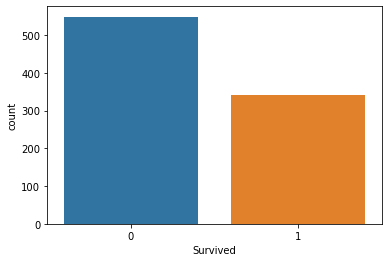

In [84]:
import seaborn as sns
sns.countplot(data['Survived'])
plt.show()

> 생존자 데이터가 사망자 데이터 보다 작다

In [85]:
# 기초통계정보 확인
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) Title 변수 추가**

In [86]:
# 호칭 추출
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [87]:
# 대표 호칭 이외는 Others로 변경
main_tit_list = ['Mr', 'Miss', 'Mrs']
data.loc[data['Title'].isin(main_tit_list)==False, ['Title']] = 'Others'

**2) 결측치 처리**

In [88]:
# Age 중앙값으로 채우기
data['Age'].fillna(data.groupby('Title')['Age'].transform('median'), inplace=True)

In [89]:
# Embarked 최빈값으로 채우기
data['Embarked'] = data['Embarked'].fillna('S')

**3) AgeGroup 변수 추가**

In [90]:
# 변수 추가
bins = [0, 16, 25, 35, 60, 100]
data['AgeGroup'] = pd.cut(data['Age'], 
                          bins=bins, 
                          labels=['0_16', '17_25', '26_35', '36_60', '61_100'])

**4) 불필요한 변수 제거**

In [91]:
# 불필요한 열 제거
drop_cols = ['PassengerId', 'Name', 'Age', 'Ticket', 'Cabin']
data.drop(drop_cols, axis=1, inplace=True)

**5) 가변수화**

In [92]:
# 가변수화
dummy_vars = ['Title', 'AgeGroup', 'Pclass', 'Sex', 'Embarked']

for v in dummy_vars:
    dummies = pd.get_dummies(data[v], prefix=v, drop_first=True)
    data = pd.concat([data, dummies], axis=1)
    data.drop(v, axis=1, inplace=True)

In [93]:
# # 가변수화
# dummy_vars = ['Title', 'AgeGroup', 'Pclass', 'Sex', 'Embarked']

# data = pd.get_dummies(data, columns=dummy_vars, drop_first=True)

**6) x, y 분리**

In [94]:
# target 확인
target = 'Survived'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target] 

**7) 정규화**

In [95]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**8) 학습용, 평가용 데이터 분리**

In [96]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 5가지 알고리즘으로 모델을 만들고 성능을 확입니다.
- 성능 평가는 confusion_matrix, classification_report를 사용합니다.
- 각 알고리즘별로 요구되는 내용을 숙지하면서 모델링을 진행합니다.

## 4.1.KNN

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 n_neighbors=5를 지정합니다.

In [97]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [98]:
# 선언하기
model = KNeighborsClassifier(n_neighbors=5)

In [99]:
# 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [100]:
# 예측하기
y_pred = model.predict(x_test)

In [101]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[152  16]
 [ 34  66]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       168
           1       0.80      0.66      0.73       100

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268



## 4.2.Decision Tree

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022을 지정합니다.

In [102]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [103]:
# 선언하기
model = DecisionTreeClassifier(max_depth=10,
                              random_state=2022)

In [104]:
# 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=2022)

In [105]:
# 예측하기
y_pred = model.predict(x_test)

In [106]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[150  18]
 [ 37  63]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       168
           1       0.78      0.63      0.70       100

    accuracy                           0.79       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.79      0.79       268



## 4.3.Random Forest

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022을 지정합니다.

In [107]:
# 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [108]:
# 선언하기
model = RandomForestClassifier(max_depth=10,
                              random_state=2022)

In [109]:
# 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=2022)

In [110]:
# 예측하기
y_pred = model.predict(x_test)

In [111]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[153  15]
 [ 33  67]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       168
           1       0.82      0.67      0.74       100

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268



## 4.4.XGBoost

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022를 지정합니다.

In [112]:
# 불러오기
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [113]:
# 선언하기
model = XGBClassifier(max_depth=10,
                     random_state=2022)

In [114]:
# 학습하기
model.fit(x_train, y_train)

[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [115]:
# 예측하기
y_pred = model.predict(x_test)

In [116]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[149  19]
 [ 30  70]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       168
           1       0.79      0.70      0.74       100

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268



## 4.5.튜닝
- Random Search  
- Grid Search

## 4.5.1튜닝 - Random Search

## 4.5.2튜닝 - Grid Search

In [117]:
# 불러오기
from sklearn.model_selection import GridSearchCV

# 매개변수 값 범위 선언(=변수 선언)
param = {'max_depth':range(3, 10),
         'min_samples_split':range(2, 11),
        'n_estimators':range(50, 121, 10)}

# 기본 모델 선언
model_rfc = RandomForestClassifier(random_state=2022)

# 튜닝
model = GridSearchCV(model_rfc,
                          param,
                          cv=10,
                          n_jobs=-1)
# 학습
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[155  13]
 [ 33  67]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       168
           1       0.84      0.67      0.74       100

    accuracy                           0.83       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.83      0.82       268



scoring의 값을 별도로 지정해 주지 않을 시, GridSearchCV와 RandomizedSearchCV 모두 scoring의디폴트 값이 None이기는 하나,

이러한 경우 튜닝을 진행하는 알고리즘 내 자체적으로 존재하는 score 메소드를 사용합니다.

대체로 회귀의 경우 r2, 분류의 경우 accuracy를 score 메소드에서 사용합니다.

In [118]:
# 확인
print(model.best_params_)
print(model.best_score_)

{'max_depth': 8, 'min_samples_split': 7, 'n_estimators': 100}
0.8428827444956477


In [119]:
# 가지고 있는 파라미터 확인
model.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 2022,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(random_state=2022),
 'n_jobs': -1,
 'param_grid': {'max_depth': range(3, 10),
  'min_samples_split': range(2, 11),
  'n_estimators': range(50, 121, 10)},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

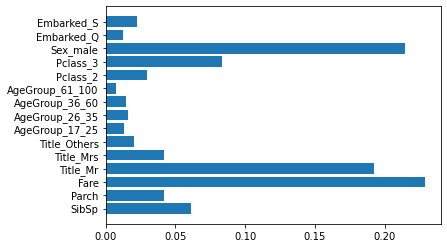

In [120]:
# feature 중요도 시각화
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()

In [121]:
# 불러오기
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# 매개변수 값 범위 선언(=변수 선언)
grid_param = {'max_depth':range(5, 16),
             'n_estimators':range(50, 151, 10)}

# 기본 모델 선언
model_xgb = XGBClassifier(random_state=2022)

# 튜닝
model = GridSearchCV(model_xgb,
                    grid_param,
                    cv=10,
                    n_jobs=-1)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[15:24:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[150  18]
 [ 28  72]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       168
           1       0.80      0.72      0.76       100

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



scoring의 값을 별도로 지정해 주지 않을 시, GridSearchCV와 RandomizedSearchCV 모두 scoring의디폴트 값이 None이기는 하나,

이러한 경우 튜닝을 진행하는 알고리즘 내 자체적으로 존재하는 score 메소드를 사용합니다.

대체로 회귀의 경우 r2, 분류의 경우 accuracy를 score 메소드에서 사용합니다.

In [122]:
# 확인
print(model.best_params_)
print(model.best_score_)

{'max_depth': 5, 'n_estimators': 50}
0.825268817204301


In [123]:
# 가지고 있는 파라미터 확인
model.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__objective': 'binary:logistic',
 'estimator__use_label_encoder': True,
 'estimator__base_score': None,
 'estimator__booster': None,
 'estimator__colsample_bylevel': None,
 'estimator__colsample_bynode': None,
 'estimator__colsample_bytree': None,
 'estimator__enable_categorical': False,
 'estimator__gamma': None,
 'estimator__gpu_id': None,
 'estimator__importance_type': None,
 'estimator__interaction_constraints': None,
 'estimator__learning_rate': None,
 'estimator__max_delta_step': None,
 'estimator__max_depth': None,
 'estimator__min_child_weight': None,
 'estimator__missing': nan,
 'estimator__monotone_constraints': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__num_parallel_tree': None,
 'estimator__predictor': None,
 'estimator__random_state': 2022,
 'estimator__reg_alpha': None,
 'estimator__reg_lambda': None,
 'estimator__scale_pos_weight': None,
 'estimator__subsample': None,
 'estimator__tree_method

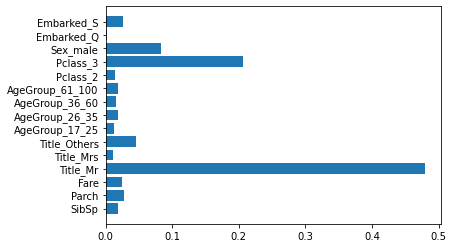

In [124]:
# feature 중요도 시각화
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()